# This notebook includes dE/dx plot for BNB tracks (after GBDT classification)

In [1]:
from notebooks_tools import *
%matplotlib inline

In [2]:
# grab the tracks file after GBDT classification
tracks_file_name = "/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/PassedGBDTFiles/multi_BNB_TrainedOn_MCBNB_MCCOSMIC/passedGBDT_BNB_5e19POT_multi_BNB_TrainedOn_MCBNB_MCCOSMIC_allscores_features_and_scores.csv"

In [ ]:
tracks = pd.read_csv(tracks_file_name,
                     usecols=['dEdx_Y', 'residual_range_Y', 'Edep_Y', 'MCpdgCode'
                              ,'mscore_p','mscore_max','mscore_mu','pidpida'],
                     converters={'dEdx_Y':generic,'residual_range_Y':generic,'Edep_Y':generic})

In [4]:
hits = DataFrame_hits( tracks )

In [5]:
protons = tracks[tracks.mscore_max==0]
p_hits = DataFrame_hits( protons )

In [6]:
muons = tracks[tracks.mscore_max==1]
mu_hits = DataFrame_hits( muons )

In [7]:
pions = tracks[tracks.mscore_max==2]
pi_hits = DataFrame_hits( pions )

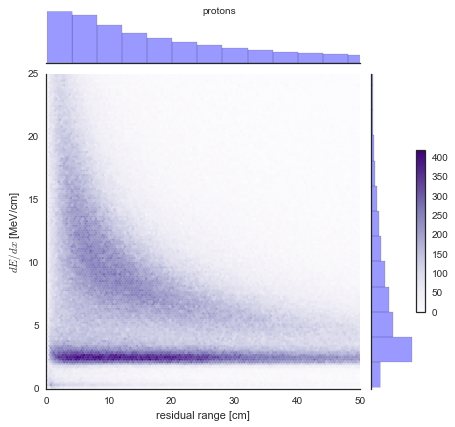

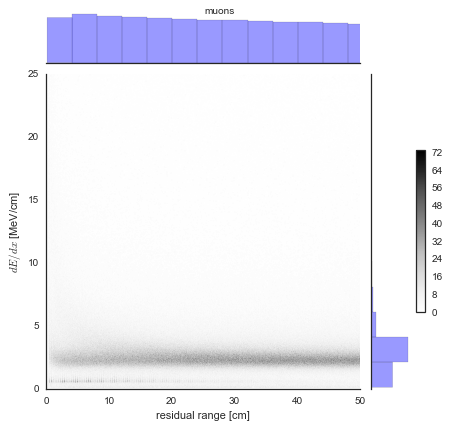

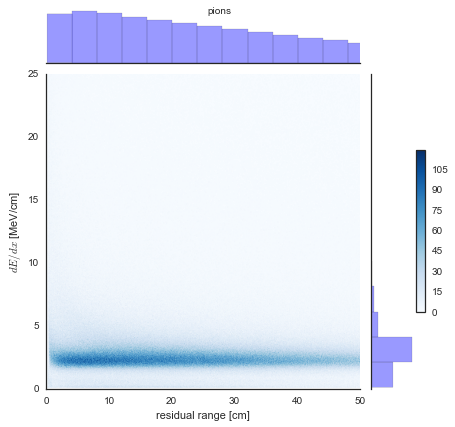

In [8]:
dEdx_jointplot(p_hits , cmap='Purples' , label='protons' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(mu_hits , cmap='Greys' , label='muons', xlim=(0,50), ylim=(0,25))
dEdx_jointplot(pi_hits , cmap='Blues' , label='pions', xlim=(0,50), ylim=(0,25))

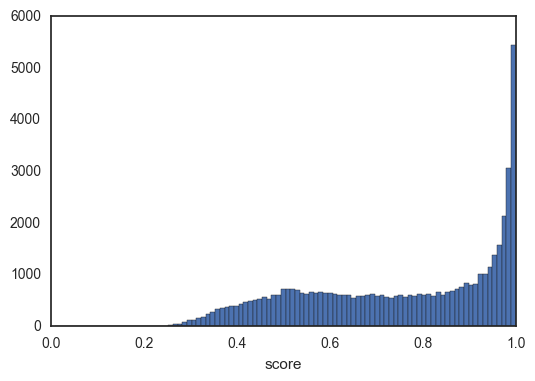

In [18]:
plt.hist(protons.mscore_p,bins=np.linspace(0,1,100))
plt.xlabel('score')

In [11]:
protons_high_score = protons[protons.mscore_p>0.9]
p_hits_high_score = DataFrame_hits( protons_high_score )
protons_low_score = protons[protons.mscore_p<0.8]
p_hits_low_score = DataFrame_hits( protons_low_score )

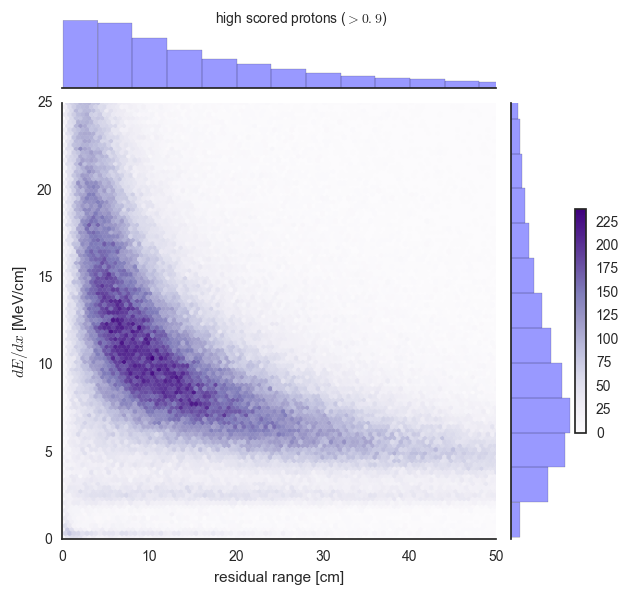

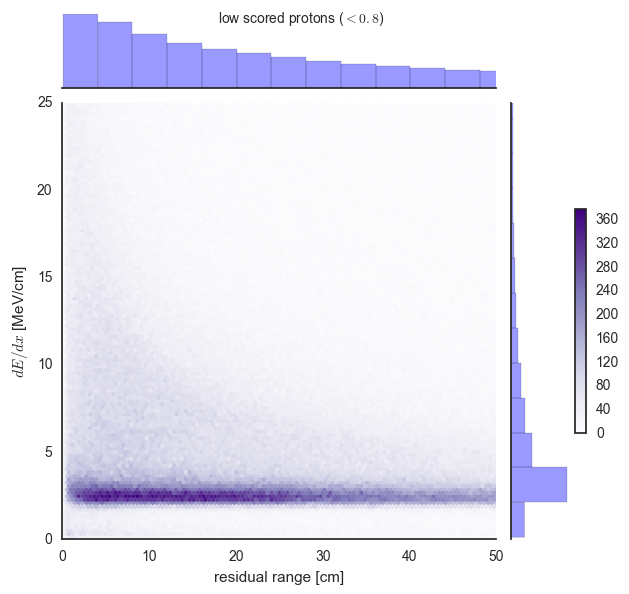

In [21]:
dEdx_jointplot(p_hits_high_score , cmap='Purples' , label='high scored protons ($> 0.9$)' , xlim=(0,50), ylim=(0,25))
dEdx_jointplot(p_hits_low_score , cmap='Purples' , label='low scored protons ($< 0.8$)' , xlim=(0,50), ylim=(0,25))

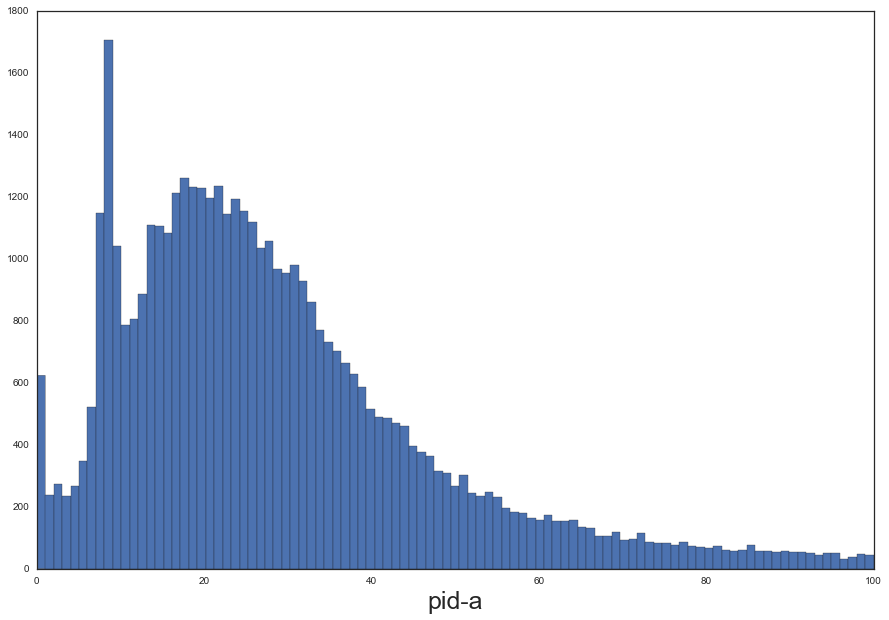

In [44]:
plt.figure(figsize=(15,10))
plt.hist(protons[protons.pidpida<200].pidpida,bins=np.linspace(0,100,100))
plt.xlabel('pid-a',fontsize=25)

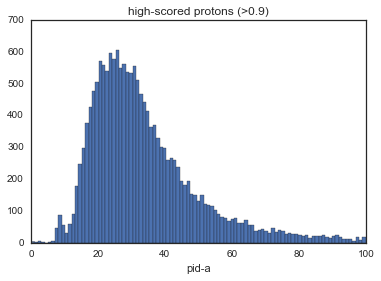

In [19]:
plt.hist(protons_high_score[protons_high_score.pidpida<200].pidpida,bins=np.linspace(0,100,100))
plt.xlabel('pid-a')
plt.title('high-scored protons (>0.9)')

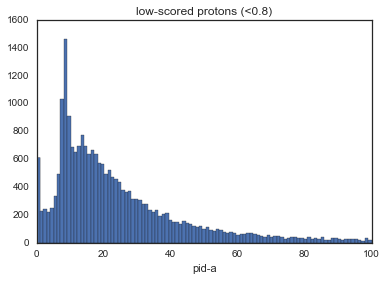

In [20]:
plt.hist(protons_low_score[protons_low_score.pidpida<200].pidpida,bins=np.linspace(0,100,100))
plt.xlabel('pid-a')
plt.title('low-scored protons (<0.8)')

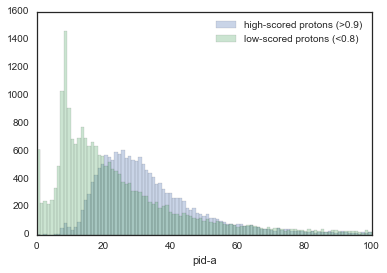

In [21]:
plt.hist(protons_high_score[protons_high_score.pidpida<200].pidpida,bins=np.linspace(0,100,100),label='high-scored protons (>0.9)',alpha=0.3)
plt.hist(protons_low_score[protons_low_score.pidpida<200].pidpida,bins=np.linspace(0,100,100),label='low-scored protons (<0.8)',alpha=0.3)
plt.xlabel('pid-a')
plt.legend()

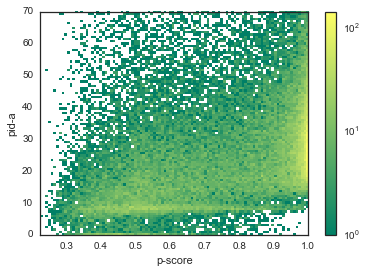

In [41]:
from matplotlib.colors import LogNorm
plt.hist2d(protons[protons.pidpida<70].mscore_p,protons[protons.pidpida<70].pidpida,bins=100,cmap='summer', norm=LogNorm())
plt.colorbar()
plt.xlabel('p-score')
plt.ylabel('pid-a')

# what are the low-score tracks?  They do not seem to behave well as protons

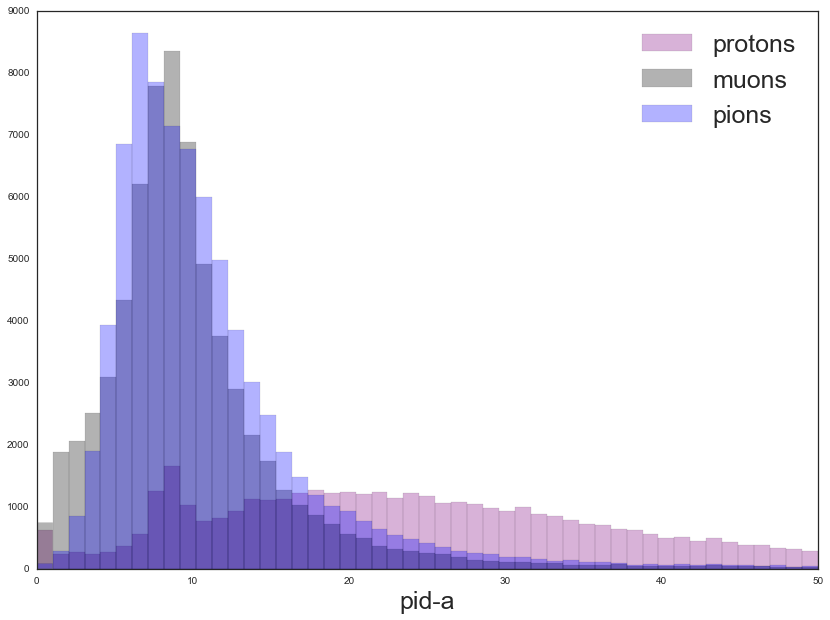

In [51]:
plt.figure(figsize=(14,10))
plt.hist(protons[protons.pidpida<200].pidpida,bins=np.linspace(0,50,50),label='protons',color='purple',alpha=0.3)
plt.hist(muons[muons.pidpida<200].pidpida,bins=np.linspace(0,50,50),label='muons',color='black',alpha=0.3)
plt.hist(pions[pions.pidpida<200].pidpida,bins=np.linspace(0,50,50),label='pions',color='blue',alpha=0.3)
plt.xlabel('pid-a',fontsize=25)
plt.legend(fontsize=25)

# combine dE/dx from Tingjun truth profiles with the data - and see where the data sits


In [9]:
dEdx_truth_protons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_protons.csv')
dEdx_truth_kaons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_kaons.csv')
dEdx_truth_pions = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_pions.csv')
dEdx_truth_muons = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/BetheBloch/dedx_range_muons.csv')

(0, 40)

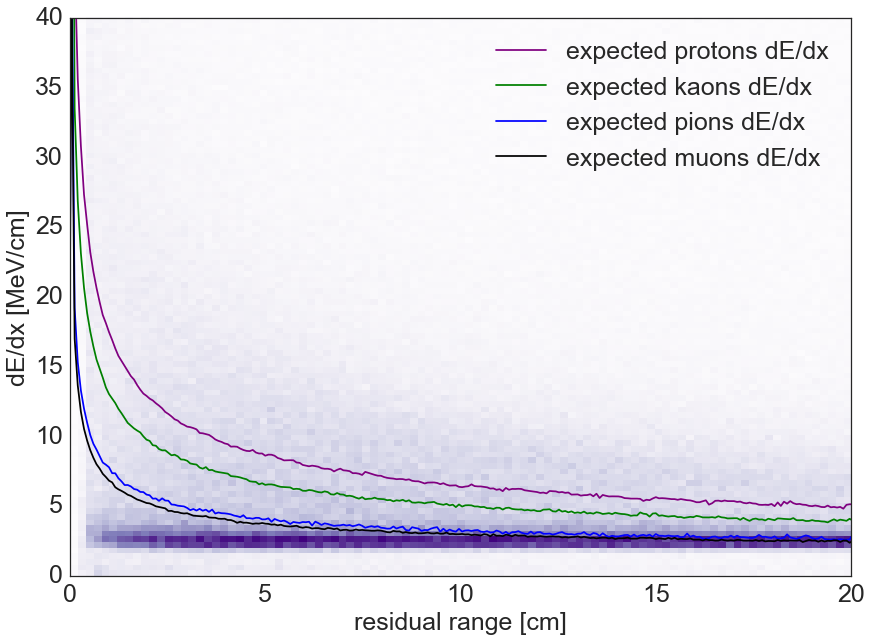

In [14]:
fig,ax = plt.subplots(figsize=(14,10))
# plt.hist2d(p_hits.residual_range , p_hits.dEdx  , bins=[np.linspace(0,20,100),np.linspace(0,40,100)], cmap='Purples' , label='reconstructed BNB protons');
# plt.hist2d(p_hits_high_score.residual_range , p_hits_high_score.dEdx  , bins=[np.linspace(0,20,100),np.linspace(0,40,100)], cmap='Purples' , label='classified BNB protons');
plt.hist2d(p_hits_low_score.residual_range , p_hits_low_score.dEdx  , bins=[np.linspace(0,20,100),np.linspace(0,40,100)], cmap='Purples' , label='classified BNB protons');


plt.plot(dEdx_truth_protons['residual range [cm]'],dEdx_truth_protons['dE/dx [MeV/cm]'],color='purple',label='expected protons dE/dx')
plt.plot(dEdx_truth_kaons['residual range [cm]'],dEdx_truth_kaons['dE/dx [MeV/cm]'],color='green',label='expected kaons dE/dx')
plt.plot(dEdx_truth_pions['residual range [cm]'],dEdx_truth_pions['dE/dx [MeV/cm]'],color='blue',label='expected pions dE/dx')
plt.plot(dEdx_truth_muons['residual range [cm]'],dEdx_truth_muons['dE/dx [MeV/cm]'],color='black',label='expected muons dE/dx')
pt.set_axes(ax,'residual range [cm]','dE/dx [MeV/cm]')
plt.legend(fontsize=25)
ax.set_xlim(0,20)
ax.set_ylim(0,40)

# Additional plots
the follwing plots are not so important, and are kept here for future reference

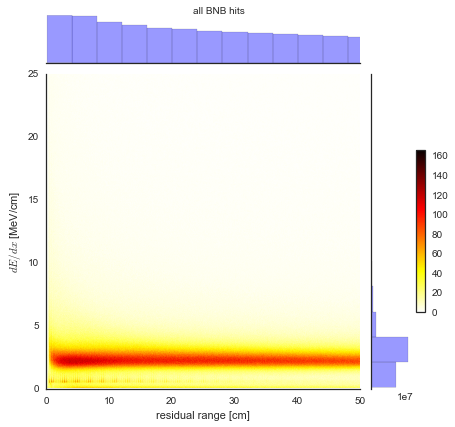

In [13]:
dEdx_jointplot(hits , cmap='hot_r' , label='all BNB hits' , xlim=(0,50), ylim=(0,25))